## Data Exploration and Preprocessing

Importing Necessary Libraries

In [122]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

Reading the Data

In [123]:
data = pd.read_csv("bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


EXPLORATORY DATA ANALYSIS:


In [124]:
print("Shape of the dataset: ", data.shape)

Shape of the dataset:  (11162, 17)


<Axes: >

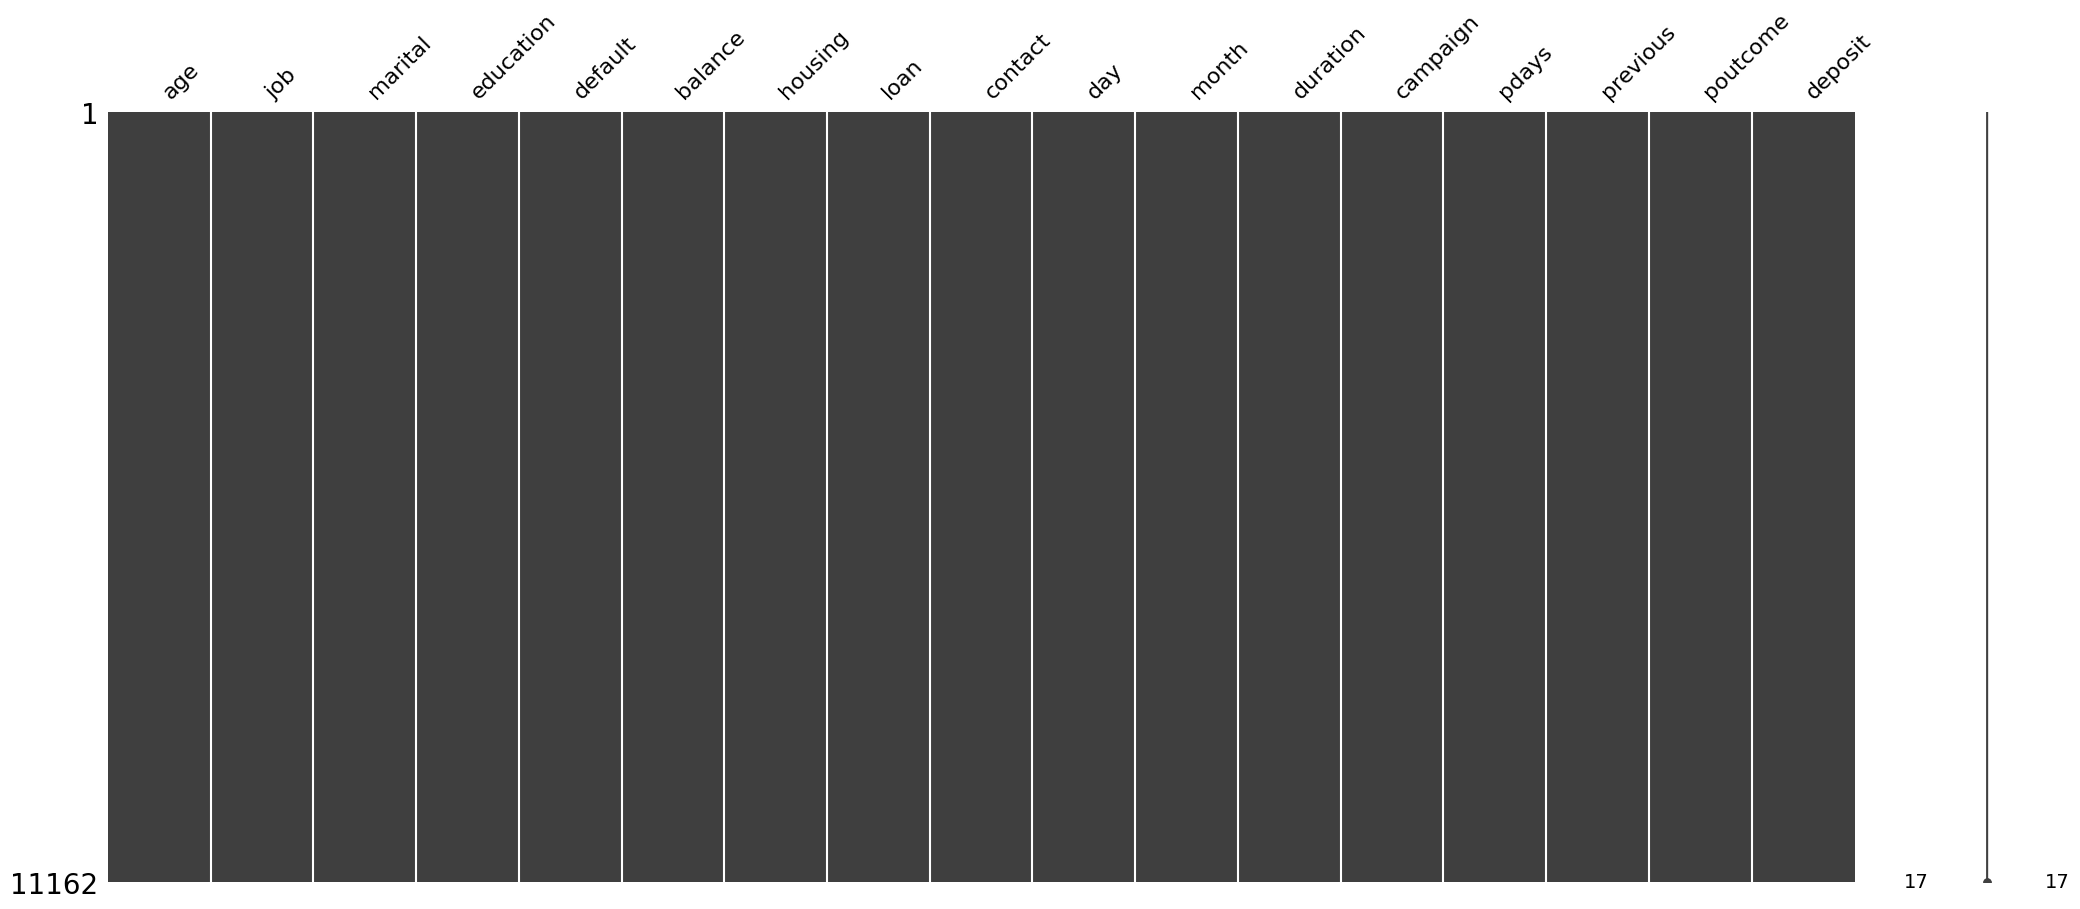

In [125]:
missingno.matrix(data)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [127]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<Axes: >

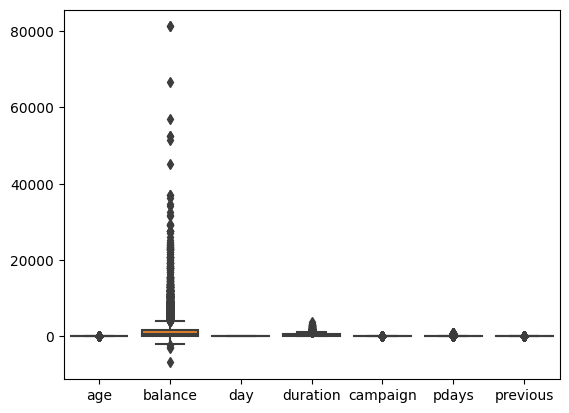

In [128]:
sns.boxplot(data=data)

AGE:

In [129]:
data['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: age
Non-Null Count  Dtype
--------------  -----
11162 non-null  int64
dtypes: int64(1)
memory usage: 87.3 KB


In [130]:
data['age'].value_counts().head(10)

age
31    496
32    477
34    466
33    464
35    461
30    456
36    432
37    370
38    353
39    343
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

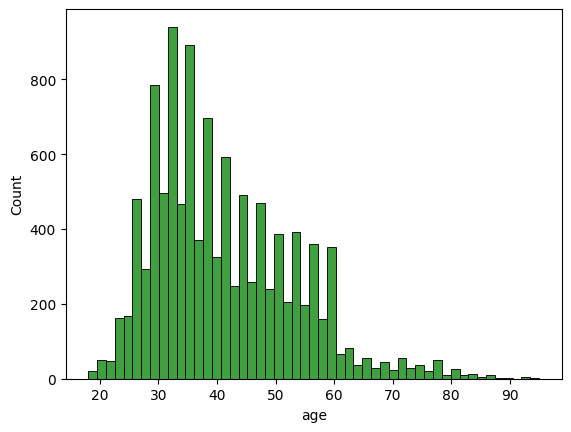

In [131]:
sns.histplot(x='age', data=data, color='green')

JOB:

In [132]:
data['job'].describe()

count          11162
unique            12
top       management
freq            2566
Name: job, dtype: object

In [133]:
data['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [134]:
px.pie(data, values=np.ones(11162), names='job', title='job',color_discrete_sequence=px.colors.sequential.Brwnyl)

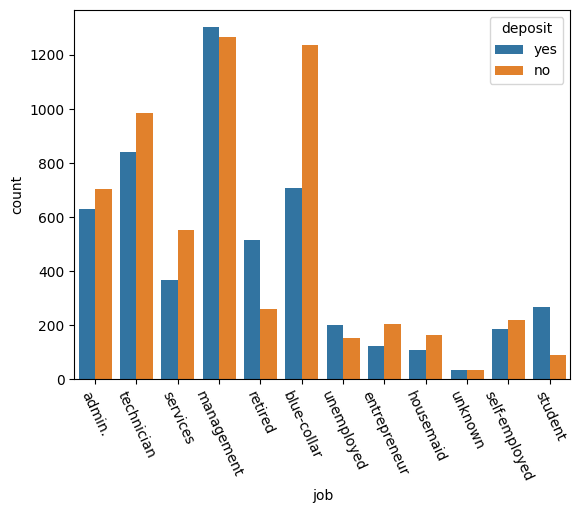

In [135]:
sns.countplot(x='job', data=data, hue='deposit')
plt.xticks(rotation=-65)
plt.show()

MARITAL:

<Axes: xlabel='marital', ylabel='count'>

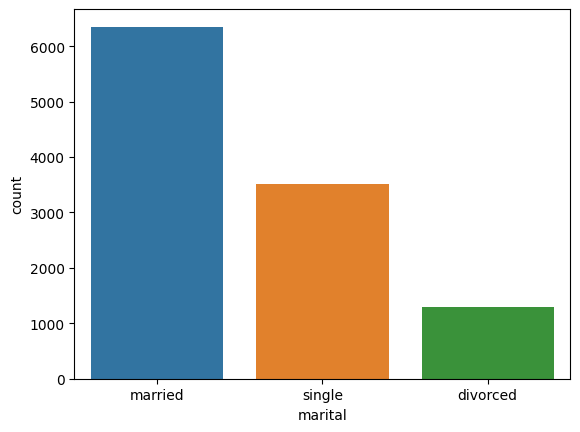

In [136]:
sns.countplot(x="marital", data=data)

In [137]:
fig = px.pie(data, values=np.ones(11162), names='marital', title='marital',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()

<Axes: xlabel='marital', ylabel='count'>

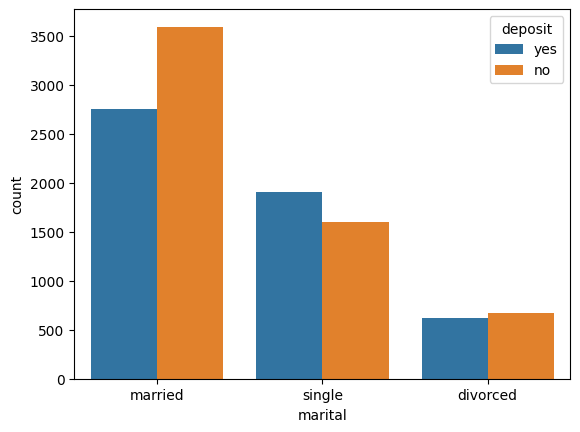

In [138]:
sns.countplot(x="marital", data=data, hue="deposit")

EDUCATION:

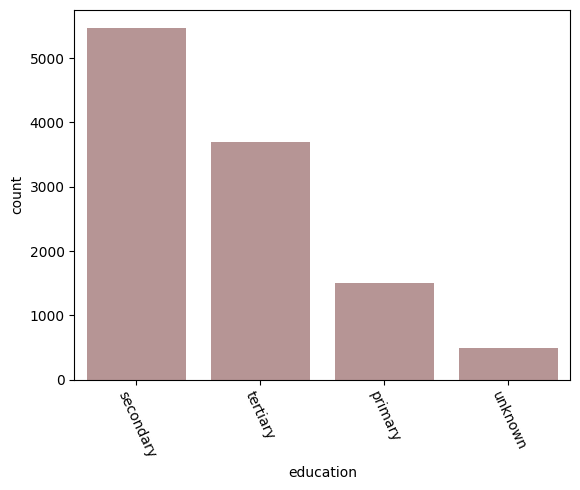

In [139]:
sns.countplot(x="education", data=data, color='rosybrown')
plt.xticks(rotation=-65)
plt.show()

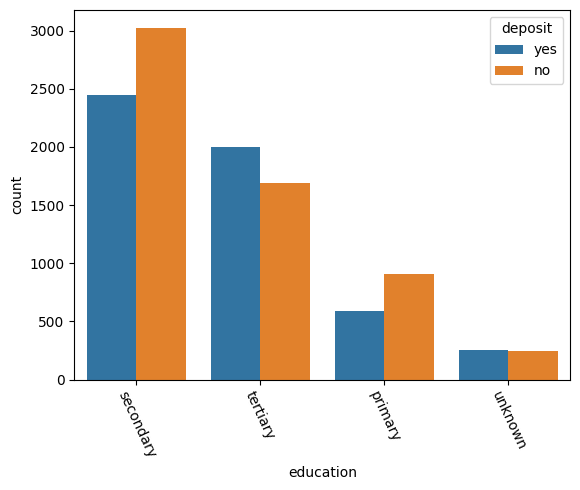

In [140]:
sns.countplot(x="education", data=data, hue="deposit")
plt.xticks(rotation=-65)
plt.show()

In [141]:
fig = px.pie(data, values=np.ones(11162), names='education', title='education',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()

DEFAULT:

<Axes: xlabel='default', ylabel='count'>

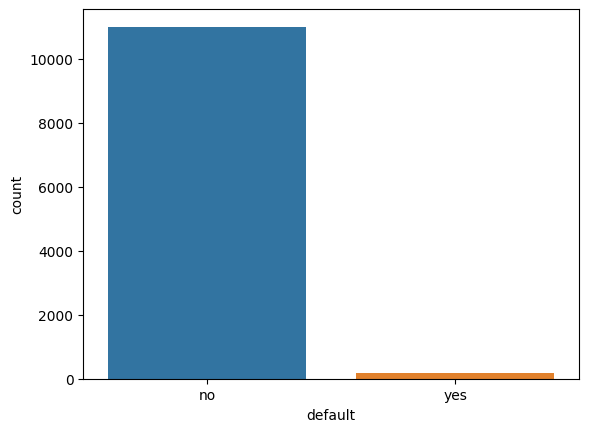

In [142]:
sns.countplot(x="default", data=data)

<Axes: xlabel='default', ylabel='count'>

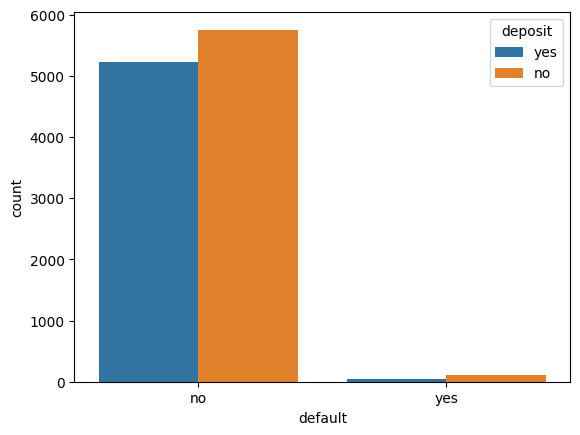

In [143]:
sns.countplot(x="default", data=data, hue="deposit")

In [144]:
fig = px.pie(data, values=np.ones(11162), names='default', title='default',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()

BALANCE:

<Axes: ylabel='balance'>

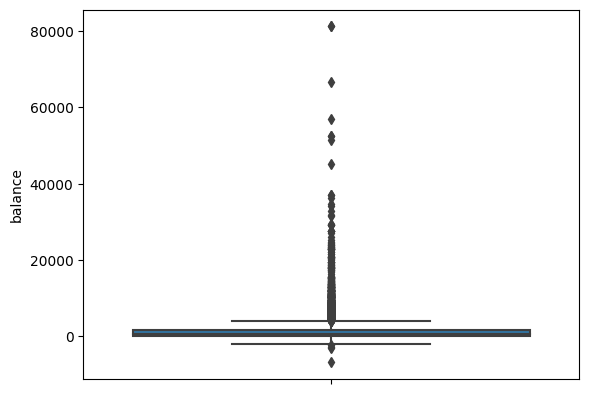

In [145]:
sns.boxplot(y="balance",data=data)

<Axes: xlabel='balance', ylabel='Density'>

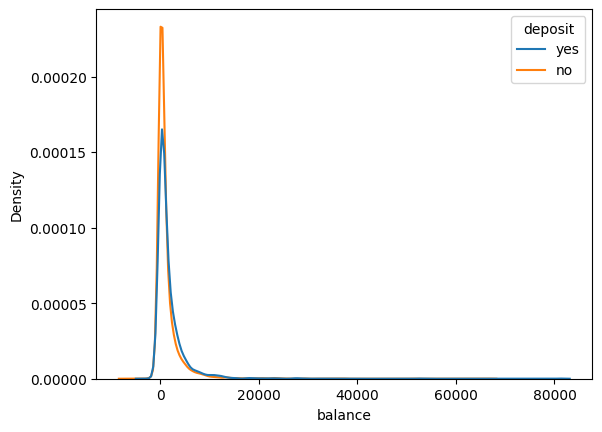

In [146]:
sns.kdeplot(x="balance",data =data,hue="deposit")

HOUSING:

<Axes: xlabel='housing', ylabel='count'>

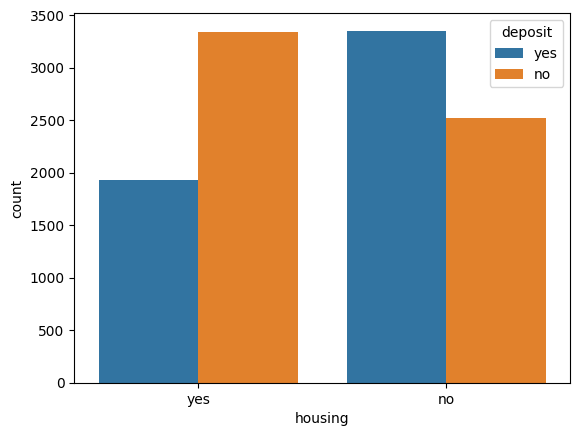

In [147]:
sns.countplot(x="housing", data=data, hue="deposit")

LOAN:

<Axes: xlabel='loan', ylabel='count'>

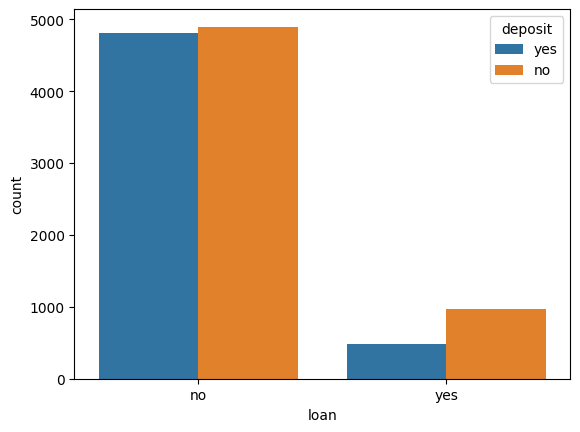

In [148]:
sns.countplot(x="loan", data=data, hue="deposit")

DURATION:

<Axes: xlabel='duration', ylabel='Density'>

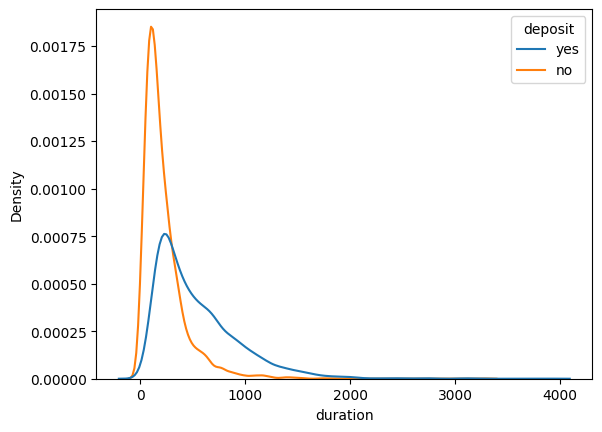

In [149]:
sns.kdeplot(x="duration",data =data,hue ="deposit")

CAMPAIGN:

<Axes: xlabel='campaign', ylabel='Density'>

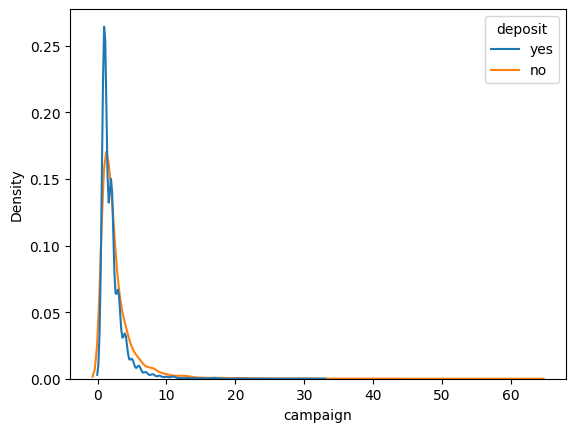

In [150]:
sns.kdeplot(data=data,x="campaign",hue="deposit")

POUTCOME:

In [151]:
fig = px.pie(data, values=np.ones(11162), names='poutcome', title='poutcome',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()

<Axes: xlabel='poutcome', ylabel='count'>

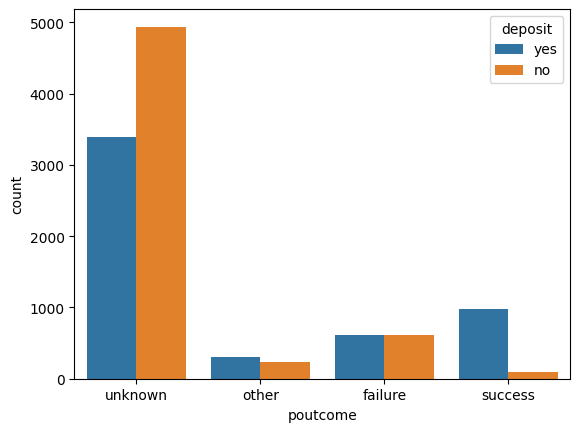

In [152]:
sns.countplot(x="poutcome", data=data, hue="deposit")

DEPOSIT:

In [153]:
fig = px.pie(data, values=np.ones(11162), names='deposit', title='deposit',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()

CORRELATION:

In [154]:
num = data.select_dtypes('int64')
num

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


<Axes: >

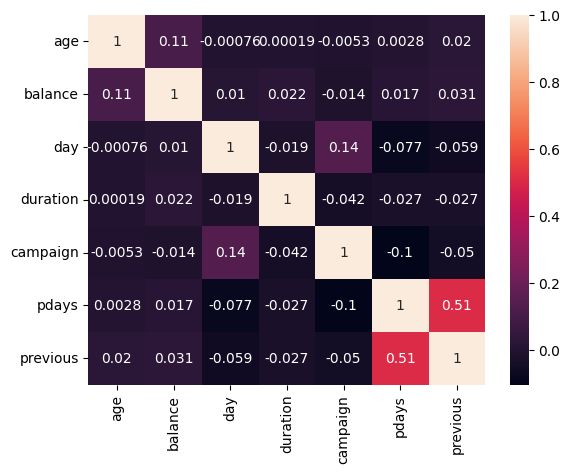

In [155]:
sns.heatmap(num.corr(),annot =True)

DATA PREPROCESSING:

LABEL ENCODING:

In [156]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [157]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()

for i in data.select_dtypes('object').columns:
    data[i] = le.fit_transform(data[i])


In [158]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [159]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [167]:
x = data.drop([ 'contact', 'day', 'month','pdays','previous','deposit'],axis =1)
x

,age,job,marital,education,default,balance,housing,loan,duration,campaign,poutcome
0,59,0,1,1,0,2343,1,0,1042,1,3
1,56,0,1,1,0,45,0,0,1467,1,3
2,41,9,1,1,0,1270,1,0,1389,1,3
3,55,7,1,1,0,2476,1,0,579,1,3
4,54,0,1,2,0,184,0,0,673,2,3
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,257,1,3
11158,39,7,1,1,0,733,0,0,83,4,3
11159,32,9,2,1,0,29,0,0,156,2,3
11160,43,9,1,1,0,0,0,1,9,2,0


In [168]:
y=data["deposit"]

CUSTOMER SEGMENTATION AND MODELLING:

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 32)

In [169]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X_scaled = ms.fit_transform(x)

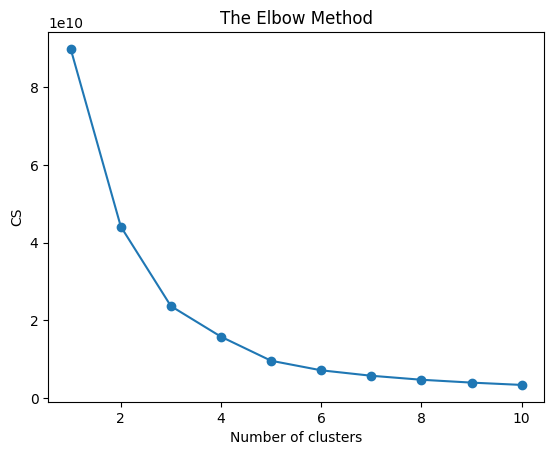

In [173]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [174]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [177]:
correct_labels = sum(y== kmeans.labels_)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 5221 out of 11162 samples were correctly labeled.
Accuracy score: 0.47


In [178]:
# Using PCA:

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [179]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(x) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,0.608737,0.173193
1,0.343215,-0.189492


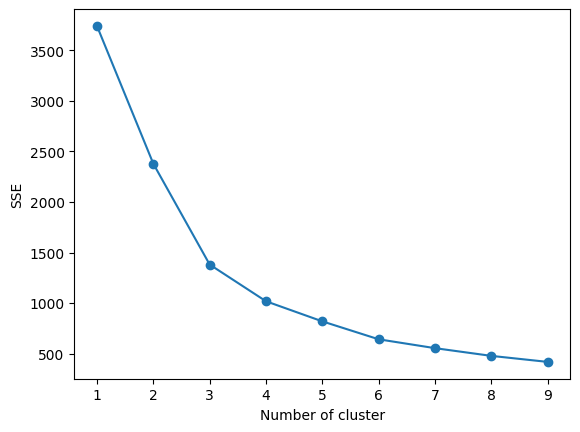

In [180]:
sse = {} #sum of squeared  errors
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),marker='o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [181]:
# Silhoutte coefficient method:

from sklearn.metrics import silhouette_score

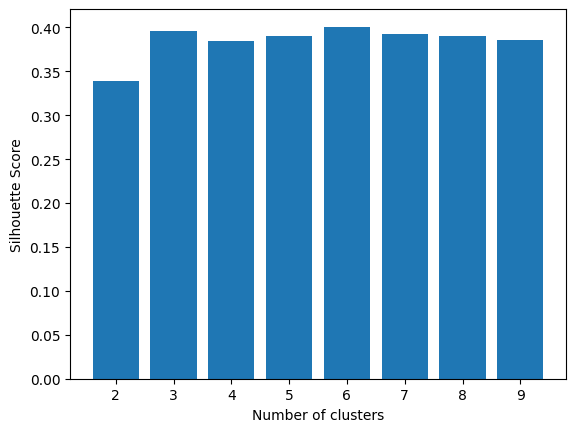

In [182]:
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [183]:
# k=3:

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_principal)

KMeans(n_clusters=3)

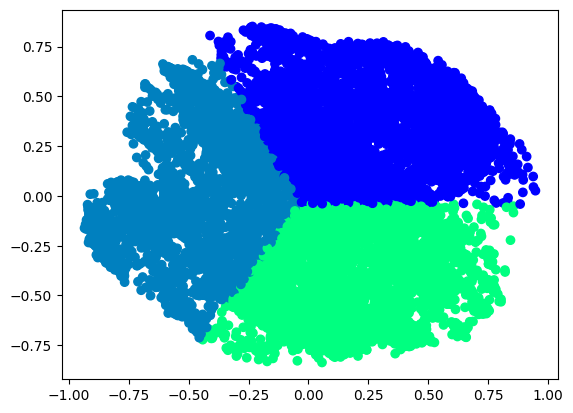

In [184]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()

In [185]:
# Hierarchial Agglomerative Clustering:

from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=False)
model_ac = ac.fit(X_train)
train_predicted = model_ac.fit_predict(X_train)
test_predicted = model_ac.fit_predict(X_test)
print(train_predicted.shape, y_train.shape)
print(test_predicted.shape, y_test.shape)

(8929,) (8929,)
(2233,) (2233,)


In [187]:
# Accuracy:

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, train_predicted)
test_accuracy = accuracy_score(y_test, test_predicted)

from sklearn.metrics import classification_report
print("Train: ",classification_report(y_train,train_predicted))
print("Test: ", classification_report(y_test,test_predicted))

Train:                precision    recall  f1-score   support

           0       0.53      0.99      0.69      4687
           1       0.56      0.01      0.02      4242

    accuracy                           0.53      8929
   macro avg       0.54      0.50      0.35      8929
weighted avg       0.54      0.53      0.37      8929

Test:                precision    recall  f1-score   support

           0       0.41      0.03      0.06      1186
           1       0.46      0.95      0.62      1047

    accuracy                           0.46      2233
   macro avg       0.44      0.49      0.34      2233
weighted avg       0.44      0.46      0.32      2233



In [189]:
# DBSCAN:

from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=3, min_samples=500)

model_dbs = dbs.fit(X_train)
predicted_train = list(map(lambda x: x+1, model_dbs.fit_predict(X_train)))
predicted_test = list(map(lambda x: x+1, model_dbs.fit_predict(X_test)))

In [190]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, predicted_train)
test_accuracy = accuracy_score(y_test, predicted_test)


print("Train: \n",classification_report(y_train,predicted_train))
print("Test: \n",classification_report(y_test,predicted_test))

Train: 
               precision    recall  f1-score   support

           0       0.52      1.00      0.69      4687
           1       0.00      0.00      0.00      4242

    accuracy                           0.52      8929
   macro avg       0.26      0.50      0.34      8929
weighted avg       0.28      0.52      0.36      8929

Test: 
               precision    recall  f1-score   support

           0       0.53      1.00      0.69      1186
           1       0.00      0.00      0.00      1047

    accuracy                           0.53      2233
   macro avg       0.27      0.50      0.35      2233
weighted avg       0.28      0.53      0.37      2233

